# ML Cup Event #3

In [21]:
!pip install pandas
!pip install numpy
!pip install pycaret
import pandas as pd
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

  Using cached pandas_profiling-3.0.0-py2.py3-none-any.whl (248 kB)


  Using cached visions-0.7.1-py3-none-any.whl (102 kB)


  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.7.1
    Uninstalling pandas-profiling-2.7.1:
      Successfully uninstalled pandas-profiling-2.7.1


In [22]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [23]:
import os
os.getcwd()

'/home/jovyan'


from google.colab import files
upload = files.upload()
upload1 = files.upload()

In [24]:
df = pd.read_csv("diabetes_train.csv")
df_test = pd.read_csv("diabetes_test.csv")

Id_col = 'Id'
target_col = 'diabetes'
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  576 non-null    int64  
 1   num_times_pregnant  576 non-null    int64  
 2   plasma_glucose      576 non-null    int64  
 3   DBP                 576 non-null    int64  
 4   triceps_skin        576 non-null    int64  
 5   serum_insulin       576 non-null    int64  
 6   BMI                 576 non-null    float64
 7   pedigree            576 non-null    float64
 8   age                 576 non-null    int64  
 9   diabetes            576 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 45.1 KB


,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes
0,358,13,129,0,30,0,39.9,0.569,44,1
1,74,4,129,86,20,270,35.1,0.231,23,0
2,353,3,61,82,28,0,34.4,0.243,46,0
3,498,2,81,72,15,76,30.1,0.547,25,0
4,146,0,102,75,23,0,0.0,0.572,21,0


In [25]:
df.isnull().sum()

Id                    0
num_times_pregnant    0
plasma_glucose        0
DBP                   0
triceps_skin          0
serum_insulin         0
BMI                   0
pedigree              0
age                   0
diabetes              0
dtype: int64

In [26]:
!pip install pandas-profiling==2.7.1

  Using cached pandas_profiling-2.7.1-py2.py3-none-any.whl (252 kB)
  Using cached visions-0.4.1-py3-none-any.whl (58 kB)


  Attempting uninstall: visions
    Found existing installation: visions 0.7.1
    Uninstalling visions-0.7.1:
      Successfully uninstalled visions-0.7.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 3.0.0
    Uninstalling pandas-profiling-3.0.0:
      Successfully uninstalled pandas-profiling-3.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pycaret 2.3.3 requires pandas-profiling>=2.8.0, but you have pandas-profiling 2.7.1 which is incompatible.


In [27]:
import matplotlib.pyplot as plt

<AxesSubplot:ylabel='diabetes'>

Text(0.5, 1.0, 'diabetes')

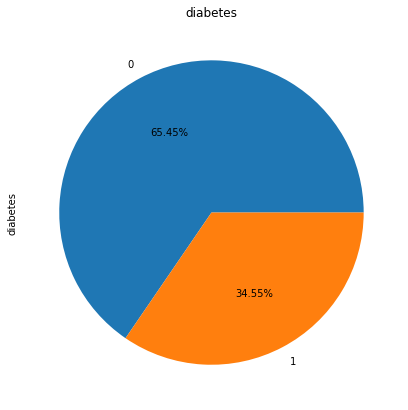

In [28]:
axs = plt.subplots(figsize=(14,7))
df['diabetes'].value_counts().plot(x=None,y=None, kind='pie', ax=axs[1],autopct='%1.2f%%')
axs[1].set_title('diabetes')
plt.show()

array([[<AxesSubplot:title={'center':'num_times_pregnant'}>,
        <AxesSubplot:title={'center':'plasma_glucose'}>,
        <AxesSubplot:title={'center':'DBP'}>],
       [<AxesSubplot:title={'center':'triceps_skin'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'pedigree'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'diabetes'}>]], dtype=object)

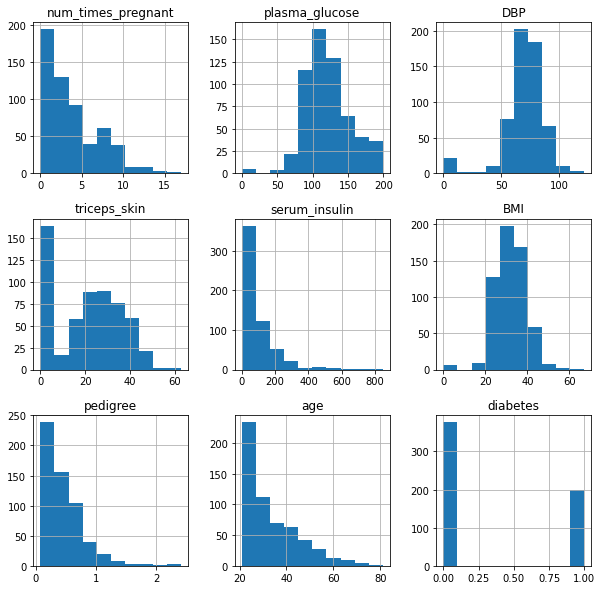

In [29]:
import matplotlib.pyplot as plt
df.iloc[:,1:].hist(figsize=(10,10))
plt.show()

In [30]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
to_cross = ['num_times_pregnant', 'serum_insulin', 'pedigree','age','plasma_glucose', 'DBP', 'triceps_skin','BMI']
crossed_feats = poly.fit_transform(df[to_cross].values)



In [63]:
crossed_feats_test = poly.fit_transform(df_test[to_cross].values)

In [31]:
crossed_feats = pd.DataFrame(crossed_feats)
df = pd.concat([df, crossed_feats], axis=1)
df.head().T

,0,1,2,3,4
Id,358.000000,74.000000,353.000000,498.000000,146.000000
num_times_pregnant,13.000000,4.000000,3.000000,2.000000,0.000000
plasma_glucose,129.000000,129.000000,61.000000,81.000000,102.000000
DBP,0.000000,86.000000,82.000000,72.000000,75.000000
triceps_skin,30.000000,20.000000,28.000000,15.000000,23.000000
serum_insulin,0.000000,270.000000,0.000000,76.000000,0.000000
BMI,39.900000,35.100000,34.400000,30.100000,0.000000
pedigree,0.569000,0.231000,0.243000,0.547000,0.572000
age,44.000000,23.000000,46.000000,25.000000,21.000000
diabetes,1.000000,0.000000,0.000000,0.000000,0.000000


In [64]:
crossed_feats_test = pd.DataFrame(crossed_feats_test)
df_test = pd.concat([df_test, crossed_feats_test], axis=1)
df_test.head().T

,0,1,2,3,4
Id,669.0000,325.000000,625.000000,691.000000,474.0000
num_times_pregnant,6.0000,2.000000,2.000000,8.000000,7.0000
plasma_glucose,98.0000,112.000000,108.000000,107.000000,136.0000
DBP,58.0000,75.000000,64.000000,80.000000,90.0000
triceps_skin,33.0000,32.000000,0.000000,0.000000,0.0000
serum_insulin,190.0000,0.000000,0.000000,0.000000,0.0000
BMI,34.0000,35.700000,30.800000,24.600000,29.9000
pedigree,0.4300,0.148000,0.158000,0.856000,0.2100
age,43.0000,21.000000,21.000000,34.000000,50.0000
0,1.0000,1.000000,1.000000,1.000000,1.0000


from sklearn.preprocessing import StandardScaler

feats = ['plasma_glucose', 'DBP', 'triceps_skin','BMI']
sc = StandardScaler()
sc_data = sc.fit_transform(df[feats])
sc_data

from sklearn.preprocessing import RobustScaler
robsc = RobustScaler()
rb_data = robsc.fit_transform(df[feats])
rb_data

from sklearn.preprocessing import MinMaxScaler

minsc = MinMaxScaler(feature_range=(0,2))
minmax_data = minsc.fit_transform(df[feats])
minmax_data

In [32]:
df

,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,diabetes,...,35,36,37,38,39,40,41,42,43,44
0,358,13,129,0,30,0,39.9,0.569,44,1,...,16641.0,0.0,3870.0,5147.1,0.0,0.0,0.0,900.0,1197.0,1592.01
1,74,4,129,86,20,270,35.1,0.231,23,0,...,16641.0,11094.0,2580.0,4527.9,7396.0,1720.0,3018.6,400.0,702.0,1232.01
2,353,3,61,82,28,0,34.4,0.243,46,0,...,3721.0,5002.0,1708.0,2098.4,6724.0,2296.0,2820.8,784.0,963.2,1183.36
3,498,2,81,72,15,76,30.1,0.547,25,0,...,6561.0,5832.0,1215.0,2438.1,5184.0,1080.0,2167.2,225.0,451.5,906.01
4,146,0,102,75,23,0,0.0,0.572,21,0,...,10404.0,7650.0,2346.0,0.0,5625.0,1725.0,0.0,529.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,72,5,139,64,35,140,28.6,0.411,26,0,...,19321.0,8896.0,4865.0,3975.4,4096.0,2240.0,1830.4,1225.0,1001.0,817.96
572,107,1,96,122,0,0,22.4,0.207,27,0,...,9216.0,11712.0,0.0,2150.4,14884.0,0.0,2732.8,0.0,0.0,501.76
573,271,10,101,86,37,0,45.6,1.136,38,1,...,10201.0,8686.0,3737.0,4605.6,7396.0,3182.0,3921.6,1369.0,1687.2,2079.36
574,436,0,141,0,0,0,42.4,0.205,29,1,...,19881.0,0.0,0.0,5978.4,0.0,0.0,0.0,0.0,0.0,1797.76


In [34]:
!pip install pycaret
from pycaret.classification import *

  Using cached pandas_profiling-3.0.0-py2.py3-none-any.whl (248 kB)


  Using cached visions-0.7.1-py3-none-any.whl (102 kB)


  Attempting uninstall: visions
    Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.7.1
    Uninstalling pandas-profiling-2.7.1:
      Successfully uninstalled pandas-profiling-2.7.1


In [35]:
clf1 = setup(df, target = 'diabetes', session_id=123, log_experiment=True, experiment_name='diabet')

,Description,Value
0,session_id,123
1,Target,diabetes
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(576, 55)"
5,Missing Values,False
6,Numeric Features,53
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [36]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7795,0.8502,0.6771,0.7121,0.6866,0.5177,0.5246,0.5490
et,Extra Trees Classifier,0.7791,0.8482,0.6410,0.7272,0.6741,0.5086,0.5167,0.2410
lr,Logistic Regression,0.7743,0.8197,0.5705,0.7448,0.6380,0.4791,0.4930,3.8980
ridge,Ridge Classifier,0.7740,0.0000,0.5976,0.7446,0.6500,0.4868,0.5024,0.1510
rf,Random Forest Classifier,0.7718,0.8559,0.6486,0.6998,0.6691,0.4958,0.5002,0.4480
lightgbm,Light Gradient Boosting Machine,0.7669,0.8458,0.6476,0.6852,0.6623,0.4850,0.4884,0.3920
lda,Linear Discriminant Analysis,0.7617,0.8299,0.5838,0.7302,0.6318,0.4604,0.4779,0.1440
knn,K Neighbors Classifier,0.7468,0.7668,0.5500,0.6780,0.6025,0.4212,0.4286,0.0330
ada,Ada Boost Classifier,0.7395,0.8025,0.6200,0.6411,0.6271,0.4279,0.4306,0.2070
nb,Naive Bayes,0.7392,0.8233,0.6043,0.6521,0.6214,0.4237,0.4290,0.0290


In [37]:
gbc = create_model('gbc') #0.6866

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6341,0.7590,0.6000,0.5000,0.5455,0.2435,0.2464
1,0.8049,0.8718,0.6000,0.8182,0.6923,0.5543,0.5686
2,0.7561,0.8228,0.7143,0.6250,0.6667,0.4757,0.4783
3,0.8500,0.9203,0.6429,0.9000,0.7500,0.6471,0.6658
4,0.7000,0.7363,0.6429,0.5625,0.6000,0.3617,0.3638
5,0.8000,0.8324,0.5714,0.8000,0.6667,0.5294,0.5447
6,0.7500,0.8187,0.6429,0.6429,0.6429,0.4505,0.4505
7,0.8250,0.8654,0.8571,0.7059,0.7742,0.6335,0.6415
8,0.8500,0.9354,0.7143,0.8333,0.7692,0.6591,0.6634
9,0.8250,0.9396,0.7857,0.7333,0.7586,0.6216,0.6225


In [41]:
lr = create_model('lr') #0.6380

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6829,0.6462,0.4000,0.6000,0.4800,0.2648,0.2761
1,0.8537,0.8949,0.7333,0.8462,0.7857,0.6755,0.6794
2,0.7561,0.8122,0.5000,0.7000,0.5833,0.4176,0.4294
3,0.8000,0.8159,0.4286,1.0000,0.6000,0.4937,0.5725
4,0.7750,0.7692,0.6429,0.6923,0.6667,0.4972,0.4980
5,0.7750,0.8352,0.6429,0.6923,0.6667,0.4972,0.4980
6,0.7750,0.8571,0.5714,0.7273,0.6400,0.4798,0.4871
7,0.7000,0.7885,0.5714,0.5714,0.5714,0.3407,0.3407
8,0.8250,0.8956,0.6429,0.8182,0.7200,0.5954,0.6045
9,0.8000,0.8819,0.5714,0.8000,0.6667,0.5294,0.5447


In [42]:
rf = create_model('rf') # 0.6691

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7317,0.8474,0.5333,0.6667,0.5926,0.3963,0.4017
1,0.7805,0.8731,0.6667,0.7143,0.6897,0.5202,0.5209
2,0.7805,0.8492,0.7143,0.6667,0.6897,0.5202,0.5209
3,0.8500,0.9409,0.6429,0.9000,0.7500,0.6471,0.6658
4,0.6500,0.7651,0.5000,0.5000,0.5000,0.2308,0.2308
5,0.7750,0.8448,0.7143,0.6667,0.6897,0.5135,0.5143
6,0.7250,0.8132,0.6429,0.6000,0.6207,0.4054,0.4060
7,0.7500,0.8214,0.7143,0.6250,0.6667,0.4681,0.4708
8,0.8000,0.8709,0.6429,0.7500,0.6923,0.5455,0.5490
9,0.8750,0.9327,0.7143,0.9091,0.8000,0.7110,0.7219


In [43]:
ef = create_model('et') # 0.6741

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7561,0.8295,0.5333,0.7273,0.6154,0.4429,0.4544
1,0.8293,0.8885,0.7333,0.7857,0.7586,0.6268,0.6277
2,0.7561,0.8122,0.6429,0.6429,0.6429,0.4577,0.4577
3,0.8500,0.9135,0.5714,1.0000,0.7273,0.6341,0.6814
4,0.6500,0.7459,0.5714,0.5000,0.5333,0.2553,0.2568
5,0.8000,0.8736,0.7143,0.7143,0.7143,0.5604,0.5604
6,0.7500,0.7995,0.6429,0.6429,0.6429,0.4505,0.4505
7,0.7750,0.8379,0.7143,0.6667,0.6897,0.5135,0.5143
8,0.7750,0.8750,0.6429,0.6923,0.6667,0.4972,0.4980
9,0.8500,0.9066,0.6429,0.9000,0.7500,0.6471,0.6658


In [44]:
tuned_gbc = tune_model(gbc) #0.6447

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7805,0.9000,0.4667,0.8750,0.6087,0.4751,0.5205
1,0.7805,0.8718,0.6000,0.7500,0.6667,0.5060,0.5130
2,0.7805,0.8651,0.6429,0.6923,0.6667,0.5034,0.5041
3,0.8250,0.9066,0.5000,1.0000,0.6667,0.5652,0.6276
4,0.6750,0.7610,0.5714,0.5333,0.5517,0.2973,0.2977
5,0.7500,0.8571,0.5714,0.6667,0.6154,0.4318,0.4346
6,0.8000,0.8544,0.6429,0.7500,0.6923,0.5455,0.5490
7,0.7250,0.8297,0.5714,0.6154,0.5926,0.3855,0.3861
8,0.8000,0.8929,0.5000,0.8750,0.6364,0.5122,0.5503
9,0.8500,0.9231,0.6429,0.9000,0.7500,0.6471,0.6658


In [45]:
tuned_lr = tune_model(lr) #0.6408

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7561,0.6744,0.4667,0.7778,0.5833,0.4258,0.4535
1,0.8537,0.8897,0.7333,0.8462,0.7857,0.6755,0.6794
2,0.7317,0.8254,0.5000,0.6364,0.5600,0.3710,0.3766
3,0.7750,0.8022,0.4286,0.8571,0.5714,0.4410,0.4897
4,0.7250,0.7555,0.5714,0.6154,0.5926,0.3855,0.3861
5,0.7750,0.8352,0.6429,0.6923,0.6667,0.4972,0.4980
6,0.7750,0.8434,0.5714,0.7273,0.6400,0.4798,0.4871
7,0.7250,0.7995,0.5714,0.6154,0.5926,0.3855,0.3861
8,0.8250,0.8929,0.5714,0.8889,0.6957,0.5808,0.6088
9,0.8250,0.9011,0.6429,0.8182,0.7200,0.5954,0.6045


In [46]:
tuned_rf = tune_model(rf) # 0.7301

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7561,0.8667,0.8000,0.6316,0.7059,0.5024,0.5127
1,0.8293,0.8744,0.8000,0.7500,0.7742,0.6372,0.6380
2,0.7805,0.8757,0.7857,0.6471,0.7097,0.5358,0.5424
3,0.8750,0.9313,0.7857,0.8462,0.8148,0.7207,0.7218
4,0.7000,0.7555,0.7857,0.5500,0.6471,0.4000,0.4193
5,0.7750,0.8764,0.8571,0.6316,0.7273,0.5431,0.5615
6,0.7250,0.8352,0.7143,0.5882,0.6452,0.4241,0.4294
7,0.7750,0.8516,0.8571,0.6316,0.7273,0.5431,0.5615
8,0.8000,0.8709,0.8571,0.6667,0.7500,0.5876,0.6005
9,0.8500,0.9451,0.8571,0.7500,0.8000,0.6809,0.6847


In [47]:
tuned_et = tune_model(et) #0.6981

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7561,0.8769,0.5333,0.7273,0.6154,0.4429,0.4544
1,0.8537,0.8974,0.7333,0.8462,0.7857,0.6755,0.6794
2,0.8293,0.8730,0.7143,0.7692,0.7407,0.6137,0.6147
3,0.8500,0.9258,0.5714,1.0000,0.7273,0.6341,0.6814
4,0.7500,0.7940,0.7143,0.6250,0.6667,0.4681,0.4708
5,0.8000,0.8736,0.6429,0.7500,0.6923,0.5455,0.5490
6,0.7250,0.8379,0.6429,0.6000,0.6207,0.4054,0.4060
7,0.7500,0.8379,0.6429,0.6429,0.6429,0.4505,0.4505
8,0.8500,0.9038,0.7143,0.8333,0.7692,0.6591,0.6634
9,0.8250,0.9286,0.6429,0.8182,0.7200,0.5954,0.6045


In [48]:
bagged_gbc = ensemble_model(gbc) #0.6834


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7317,0.8308,0.5333,0.6667,0.5926,0.3963,0.4017
1,0.8537,0.8923,0.7333,0.8462,0.7857,0.6755,0.6794
2,0.7561,0.8677,0.6429,0.6429,0.6429,0.4577,0.4577
3,0.8250,0.9121,0.6429,0.8182,0.7200,0.5954,0.6045
4,0.7250,0.7527,0.7143,0.5882,0.6452,0.4241,0.4294
5,0.7750,0.8434,0.5714,0.7273,0.6400,0.4798,0.4871
6,0.7500,0.8324,0.6429,0.6429,0.6429,0.4505,0.4505
7,0.7750,0.8599,0.7143,0.6667,0.6897,0.5135,0.5143
8,0.8750,0.9231,0.6429,1.0000,0.7826,0.7006,0.7343
9,0.8000,0.9203,0.6429,0.7500,0.6923,0.5455,0.5490


In [49]:
bagged_lr = ensemble_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7073,0.7436,0.4667,0.6364,0.5385,0.3315,0.3401
1,0.8293,0.9077,0.7333,0.7857,0.7586,0.6268,0.6277
2,0.7561,0.8175,0.5714,0.6667,0.6154,0.4384,0.4411
3,0.8250,0.8599,0.5000,1.0000,0.6667,0.5652,0.6276
4,0.7250,0.7665,0.5714,0.6154,0.5926,0.3855,0.3861
5,0.7250,0.8104,0.5000,0.6364,0.5600,0.3642,0.3698
6,0.8000,0.8764,0.6429,0.7500,0.6923,0.5455,0.5490
7,0.6750,0.7720,0.5000,0.5385,0.5185,0.2737,0.2742
8,0.8250,0.9286,0.5000,1.0000,0.6667,0.5652,0.6276
9,0.8250,0.8791,0.7143,0.7692,0.7407,0.6089,0.6099


In [50]:
bagged_rf = ensemble_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7317,0.8615,0.5333,0.6667,0.5926,0.3963,0.4017
1,0.8293,0.8667,0.7333,0.7857,0.7586,0.6268,0.6277
2,0.8049,0.8651,0.7143,0.7143,0.7143,0.5661,0.5661
3,0.8250,0.9313,0.5000,1.0000,0.6667,0.5652,0.6276
4,0.7250,0.7514,0.6429,0.6000,0.6207,0.4054,0.4060
5,0.7750,0.8654,0.6429,0.6923,0.6667,0.4972,0.4980
6,0.7750,0.8022,0.6429,0.6923,0.6667,0.4972,0.4980
7,0.7500,0.8379,0.7143,0.6250,0.6667,0.4681,0.4708
8,0.8250,0.8901,0.6429,0.8182,0.7200,0.5954,0.6045
9,0.8500,0.9093,0.6429,0.9000,0.7500,0.6471,0.6658


In [51]:
bagged_et = ensemble_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7561,0.8615,0.5333,0.7273,0.6154,0.4429,0.4544
1,0.8293,0.8769,0.7333,0.7857,0.7586,0.6268,0.6277
2,0.7805,0.8638,0.6429,0.6923,0.6667,0.5034,0.5041
3,0.8250,0.9313,0.5714,0.8889,0.6957,0.5808,0.6088
4,0.6500,0.7637,0.5000,0.5000,0.5000,0.2308,0.2308
5,0.7750,0.8585,0.7143,0.6667,0.6897,0.5135,0.5143
6,0.7250,0.7885,0.5714,0.6154,0.5926,0.3855,0.3861
7,0.7500,0.8407,0.7143,0.6250,0.6667,0.4681,0.4708
8,0.8000,0.8626,0.6429,0.7500,0.6923,0.5455,0.5490
9,0.8250,0.9203,0.5714,0.8889,0.6957,0.5808,0.6088


In [52]:
boosted_gbc = ensemble_model(gbc, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6341,0.7436,0.6000,0.5000,0.5455,0.2435,0.2464
1,0.8049,0.8692,0.6000,0.8182,0.6923,0.5543,0.5686
2,0.7561,0.8175,0.7143,0.6250,0.6667,0.4757,0.4783
3,0.8500,0.9231,0.6429,0.9000,0.7500,0.6471,0.6658
4,0.7250,0.7418,0.6429,0.6000,0.6207,0.4054,0.4060
5,0.8000,0.8462,0.5714,0.8000,0.6667,0.5294,0.5447
6,0.7000,0.8132,0.6429,0.5625,0.6000,0.3617,0.3638
7,0.8250,0.8626,0.8571,0.7059,0.7742,0.6335,0.6415
8,0.8750,0.9327,0.7857,0.8462,0.8148,0.7207,0.7218
9,0.8250,0.9148,0.7857,0.7333,0.7586,0.6216,0.6225


In [53]:
boosted_lr = ensemble_model(lr, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7317,0.6897,0.4000,0.7500,0.5217,0.3585,0.3927
1,0.8537,0.8949,0.7333,0.8462,0.7857,0.6755,0.6794
2,0.7317,0.8704,0.5714,0.6154,0.5926,0.3930,0.3936
3,0.8000,0.8132,0.5000,0.8750,0.6364,0.5122,0.5503
4,0.7500,0.7473,0.7143,0.6250,0.6667,0.4681,0.4708
5,0.7750,0.8434,0.5714,0.7273,0.6400,0.4798,0.4871
6,0.7750,0.8187,0.5714,0.7273,0.6400,0.4798,0.4871
7,0.7250,0.8077,0.5714,0.6154,0.5926,0.3855,0.3861
8,0.8000,0.9121,0.5000,0.8750,0.6364,0.5122,0.5503
9,0.8250,0.9011,0.6429,0.8182,0.7200,0.5954,0.6045


In [54]:
boosted_rf = ensemble_model(rf, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7317,0.8795,0.4667,0.7000,0.5600,0.3779,0.3940
1,0.8049,0.8833,0.6667,0.7692,0.7143,0.5673,0.5706
2,0.8049,0.8862,0.7143,0.7143,0.7143,0.5661,0.5661
3,0.9000,0.9464,0.7143,1.0000,0.8333,0.7647,0.7868
4,0.6750,0.7431,0.5714,0.5333,0.5517,0.2973,0.2977
5,0.7750,0.8640,0.7143,0.6667,0.6897,0.5135,0.5143
6,0.7000,0.8228,0.6429,0.5625,0.6000,0.3617,0.3638
7,0.7250,0.8365,0.6429,0.6000,0.6207,0.4054,0.4060
8,0.8500,0.8970,0.7143,0.8333,0.7692,0.6591,0.6634
9,0.8750,0.9272,0.7857,0.8462,0.8148,0.7207,0.7218


In [55]:
boosted_et = ensemble_model(et, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7073,0.8564,0.4667,0.6364,0.5385,0.3315,0.3401
1,0.8049,0.8846,0.6667,0.7692,0.7143,0.5673,0.5706
2,0.7317,0.8479,0.5714,0.6154,0.5926,0.3930,0.3936
3,0.8750,0.9258,0.6429,1.0000,0.7826,0.7006,0.7343
4,0.6500,0.7624,0.5714,0.5000,0.5333,0.2553,0.2568
5,0.7750,0.8668,0.7143,0.6667,0.6897,0.5135,0.5143
6,0.7000,0.7981,0.6429,0.5625,0.6000,0.3617,0.3638
7,0.7250,0.8146,0.7143,0.5882,0.6452,0.4241,0.4294
8,0.8250,0.8750,0.7857,0.7333,0.7586,0.6216,0.6225
9,0.9000,0.9560,0.7857,0.9167,0.8462,0.7727,0.7778


In [57]:
blender = blend_models(estimator_list = [tuned_rf, tuned_et,boosted_gbc], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6829,0.8128,0.5333,0.5714,0.5517,0.3069,0.3073
1,0.8049,0.8923,0.6667,0.7692,0.7143,0.5673,0.5706
2,0.8049,0.8624,0.7857,0.6875,0.7333,0.5806,0.5838
3,0.8500,0.9341,0.7143,0.8333,0.7692,0.6591,0.6634
4,0.7500,0.7555,0.7857,0.6111,0.6875,0.4845,0.4952
5,0.7250,0.8736,0.5714,0.6154,0.5926,0.3855,0.3861
6,0.7500,0.8352,0.6429,0.6429,0.6429,0.4505,0.4505
7,0.8000,0.8599,0.8571,0.6667,0.7500,0.5876,0.6005
8,0.8250,0.9203,0.7857,0.7333,0.7586,0.6216,0.6225
9,0.8000,0.9313,0.7143,0.7143,0.7143,0.5604,0.5604


In [58]:
stacker = stack_models(estimator_list = [tuned_rf, tuned_et,boosted_gbc], meta_model=rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7805,0.8333,0.6000,0.7500,0.6667,0.5060,0.5130
1,0.8293,0.8962,0.7333,0.7857,0.7586,0.6268,0.6277
2,0.8537,0.8704,0.7143,0.8333,0.7692,0.6630,0.6672
3,0.8750,0.9135,0.7143,0.9091,0.8000,0.7110,0.7219
4,0.7250,0.7788,0.6429,0.6000,0.6207,0.4054,0.4060
5,0.8000,0.8475,0.6429,0.7500,0.6923,0.5455,0.5490
6,0.6750,0.7953,0.6429,0.5294,0.5806,0.3194,0.3234
7,0.7500,0.8159,0.6429,0.6429,0.6429,0.4505,0.4505
8,0.8750,0.9052,0.7857,0.8462,0.8148,0.7207,0.7218
9,0.8250,0.9148,0.6429,0.8182,0.7200,0.5954,0.6045


In [59]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [60]:
best = automl(optimize = 'F1')

In [61]:
pred_holdouts = predict_model(tuned_rf)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6879,0.7712,0.6667,0.5205,0.5846,0.3406,0.3473


,Id,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,0,1,...,num_times_pregnant_3,num_times_pregnant_4,num_times_pregnant_5,num_times_pregnant_6,num_times_pregnant_7,num_times_pregnant_8,num_times_pregnant_9,diabetes,Label,Score
0,112.0,155.0,62.0,26.0,495.0,34.000000,0.543,46.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.8835
1,207.0,196.0,76.0,29.0,280.0,37.500000,0.605,57.0,1.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9566
2,684.0,125.0,80.0,0.0,0.0,32.299999,0.536,27.0,1.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0.6261
3,239.0,164.0,84.0,21.0,0.0,30.799999,0.831,32.0,1.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.8380
4,47.0,146.0,56.0,0.0,0.0,29.700001,0.564,29.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.6273


In [65]:
predict_test = predict_model(best, data = df_test)
predict_test

,Id,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age,0,...,37,38,39,40,41,42,43,44,Label,Score
0,669,6,98,58,33,190,34.0,0.430,43,1.0,...,3234.0,3332.0,3364.0,1914.0,1972.0,1089.0,1122.0,1156.00,1,0.5979
1,325,2,112,75,32,0,35.7,0.148,21,1.0,...,3584.0,3998.4,5625.0,2400.0,2677.5,1024.0,1142.4,1274.49,0,0.8834
2,625,2,108,64,0,0,30.8,0.158,21,1.0,...,0.0,3326.4,4096.0,0.0,1971.2,0.0,0.0,948.64,0,0.9312
3,691,8,107,80,0,0,24.6,0.856,34,1.0,...,0.0,2632.2,6400.0,0.0,1968.0,0.0,0.0,605.16,0,0.6477
4,474,7,136,90,0,0,29.9,0.210,50,1.0,...,0.0,4066.4,8100.0,0.0,2691.0,0.0,0.0,894.01,1,0.6877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,555,1,84,64,23,115,36.9,0.471,28,1.0,...,1932.0,3099.6,4096.0,1472.0,2361.6,529.0,848.7,1361.61,0,0.8687
188,320,6,194,78,0,0,23.5,0.129,59,1.0,...,0.0,4559.0,6084.0,0.0,1833.0,0.0,0.0,552.25,1,0.7599
189,595,6,123,72,45,230,33.6,0.733,34,1.0,...,5535.0,4132.8,5184.0,3240.0,2419.2,2025.0,1512.0,1128.96,1,0.7217
190,7,3,78,50,32,88,31.0,0.248,26,1.0,...,2496.0,2418.0,2500.0,1600.0,1550.0,1024.0,992.0,961.00,0,0.9416


In [67]:
submission = predict_test[['Id','Label']]
submission = submission.rename(columns={'Label': 'diabetes'})
submission.to_csv("submission.csv")

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop([Id_col, target_col], axis=1)
y = df[target_col]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X.info()
X.shape
X.head()

X_train.info()
X_train.shape
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_times_pregnant  576 non-null    int64  
 1   plasma_glucose      576 non-null    int64  
 2   DBP                 576 non-null    int64  
 3   triceps_skin        576 non-null    int64  
 4   serum_insulin       576 non-null    int64  
 5   BMI                 576 non-null    float64
 6   pedigree            576 non-null    float64
 7   age                 576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


(576, 8)

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
0,13,129,0,30,0,39.9,0.569,44
1,4,129,86,20,270,35.1,0.231,23
2,3,61,82,28,0,34.4,0.243,46
3,2,81,72,15,76,30.1,0.547,25
4,0,102,75,23,0,0.0,0.572,21


<class 'pandas.core.frame.DataFrame'>
Int64Index: 460 entries, 437 to 102
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   num_times_pregnant  460 non-null    int64  
 1   plasma_glucose      460 non-null    int64  
 2   DBP                 460 non-null    int64  
 3   triceps_skin        460 non-null    int64  
 4   serum_insulin       460 non-null    int64  
 5   BMI                 460 non-null    float64
 6   pedigree            460 non-null    float64
 7   age                 460 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 32.3 KB


(460, 8)

,num_times_pregnant,plasma_glucose,DBP,triceps_skin,serum_insulin,BMI,pedigree,age
437,6,102,82,0,0,30.8,0.180,36
63,7,142,60,33,190,28.8,0.687,61
208,1,119,44,47,63,35.5,0.280,25
60,8,143,66,0,0,34.9,0.129,41
15,0,123,88,37,0,35.2,0.197,29


In [ ]:
np.bincount(y)

array([377, 199], dtype=int64)

# Build Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

# Estimate Model Performance

In [ ]:
from sklearn.metrics import confusion_matrix

pred_val = clf.predict(X_val)
pred_val

confusion_matrix(y_val, pred_val)

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

array([[78,  3],
       [19, 16]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, pred_val))

F1 Score = 0.59

              precision    recall  f1-score   support

           0       0.80      0.96      0.88        81
           1       0.84      0.46      0.59        35

    accuracy                           0.81       116
   macro avg       0.82      0.71      0.73       116
weighted avg       0.82      0.81      0.79       116



# Create Submission File on Test Data

In [ ]:
test_df = pd.read_csv('diabetes_test.csv')

# Make sure to transform/create the features the same way you did for training
# For now, nothing to do

X_test = test_df.drop([Id_col], axis=1)

# Use your model to make predictions
pred_test = clf.predict(X_test)

# We will look at the predicted prices to ensure we have something sensible.
print(pred_test)

my_submission = pd.DataFrame({'Id': test_df.Id, 'Predicted': pred_test})

my_submission.head()

# you could use any filename. We choose submission here
my_submission.to_csv('my_submission.csv', index=False)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0]


,Id,Predicted
0,669,0
1,325,0
2,625,0
3,691,0
4,474,0
